In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import pymc
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Post rate per hour per user, i-th element represent the post rate of i-th user
X = np.array([10, 14, 12, 1200, 25, 120, 54, 32, 18, 23])
X_test = np.array([1500, 10, 35, 400])

# Prior
mu = pymc.Uniform('mu', 0, 1000)
sigma = pymc.Uniform('sigma', 0, 1000)

# Likelihood
likelihood = pymc.Normal('likelihood', mu, sigma**-2, observed=True, value=X)

mcmc = pymc.MCMC([mu, sigma, likelihood])
mcmc.sample(iter=11000, burn=1000)

 [-----------------100%-----------------] 11000 of 11000 complete in 1.0 sec

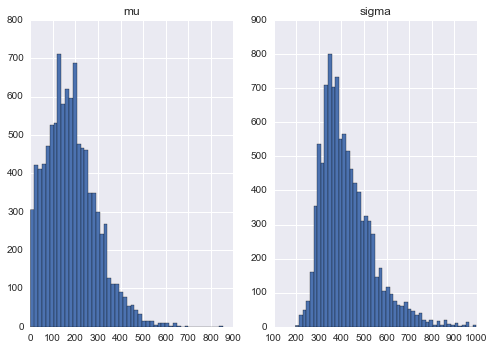

In [3]:
for i, v in enumerate(['mu', 'sigma']):
    x = mcmc.trace(v)[:]
    plt.subplot(1, 2, i+1)
    plt.hist(x, 50)
    plt.title(v)

In [4]:
# Posterior stats
stats = mcmc.stats()
print('mu')
print(stats['mu'])
print()
print('sigma')
print(stats['sigma'])

mu
{'mean': 182.85055097100005, 'mc error': 2.5368508099412526, 'n': 10000, 'quantiles': {25: 100.94088753573646, 2.5: 13.170393494439345, 75: 248.07686488069197, 50: 171.05117854124674, 97.5: 440.36424137577194}, 'standard deviation': 110.70462942599232, '95% HPD interval': array([  1.81931545e-01,   3.85816228e+02])}

sigma
{'mean': 423.97946948837551, 'mc error': 3.4523874973870528, 'n': 10000, 'quantiles': {25: 342.71890859113728, 2.5: 267.70352814919136, 75: 483.19987493101064, 50: 398.28831738055732, 97.5: 718.10218874271732}, 'standard deviation': 115.36875138850608, '95% HPD interval': array([ 242.32608458,  668.49353167])}


In [5]:
# Get point estimate from the posteriors, because the distribution is skewed, use median
mu = stats['mu']['quantiles'][50]
sigma = stats['sigma']['quantiles'][50]
print('mu: {}, sigma: {}'.format(mu, sigma))

mu: 171.05117854124674, sigma: 398.2883173805573


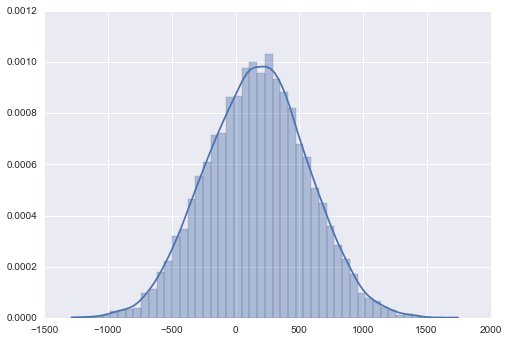

In [6]:
# Fitted model
samples = np.random.normal(mu, sigma, size=10000)
sns.distplot(samples);

In [7]:
y_test = st.norm.cdf(X_test, mu, sigma)

# Define the anomaly threshold, for example, 25% right tail of the Gaussian are the anomalies
t = 0.75

for x, y in zip(X_test, y_test):
    print('{}: {:.2f} - {}'.format(x, y, 'normal' if y < t else 'anomaly'))

1500: 1.00 - anomaly
10: 0.34 - normal
35: 0.37 - normal
400: 0.72 - normal
